# Exploration et traitement des données

### Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Lecture du DataFrame

In [2]:
df = pd.read_csv("../data/raw/Titanic-Dataset.csv")

### Premier aperçu

In [3]:
display(df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
display(df.sample(5))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
860,861,0,3,"Hansen, Mr. Claus Peter",male,41.0,2,0,350026,14.1083,NaN,S
385,386,0,2,"Davies, Mr. Charles Henry",male,18.0,0,0,S.O.C. 14879,73.5000,NaN,S
432,433,1,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.0,1,0,SC/AH 3085,26.0000,NaN,S
306,307,1,1,"Fleming, Miss. Margaret",female,NaN,0,0,17421,110.8833,NaN,C
102,103,0,1,"White, Mr. Richard Frasar",male,21.0,0,1,35281,77.2875,D26,S


### Structure

In [5]:
print("Shape : ", df.shape)

Shape :  (891, 12)


In [6]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

In [7]:
display(df.describe(include="all").T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


### Valeurs manquantes

In [8]:
missing = df.isna().sum().to_frame("missing_count")
missing["missing_pct"] = missing["missing_count"] / len(df) * 100
display(missing.sort_values("missing_pct", ascending=False))

,missing_count,missing_pct
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
PassengerId,0,0.000000
Name,0,0.000000
Pclass,0,0.000000
Survived,0,0.000000
Sex,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000


Au vu des valeurs manquantes :
- Suppression de la colonne **Cabin** *(77% des valeurs manquantes)*
- Suppression des lignes ou la valeur **Age** est manquante *(20% environ)*
- Il manque des valeurs aussi pour la colonne **Embarked**, mais elle ne sera pas prise en compte dans le modèle car peut pertinente

## Analyse des données

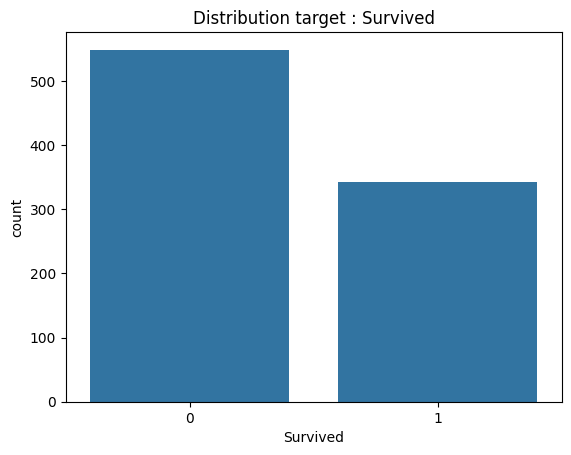

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


In [9]:
sns.countplot(x="Survived", data=df)
plt.title("Distribution target : Survived")
plt.show()

print(df["Survived"].value_counts(normalize=True))


38% des personnes ont survécues au naufrage, 61% sont décédées.

### Fonctions de nettoyage

In [10]:
def base_processing(df_in):
    """Supprime colonnes textuelles inutiles et prépare une copie."""
    df0 = df_in.copy()
    # Colonnes à garder par défaut
    keep = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
    # Supprimer les colonnes non listées si elles existent
    to_drop = [c for c in df0.columns if c not in keep]
    for c in to_drop:
        df0.drop(columns=[c], inplace=True)
    return df0

In [11]:
def encode(df0):
    if 'Sex' in df0.columns:
        df0['Sex'] = df0['Sex'].map({'male': 0, 'female': 1})
    return df0

### Nettoyage strict (suppression NaN)

In [12]:
df_strict = base_processing(df)
required_cols = ['Survived', 'Pclass', 'Sex', 'Age', 'Fare']
before = len(df_strict)
df_strict = df_strict.dropna(subset=required_cols).copy()
after = len(df_strict)
print(f"\nSTRICT: lignes avant={before}, après suppression NaN={after}, supprimées={before-after}")
df_strict = encode(df_strict)


STRICT: lignes avant=891, après suppression NaN=714, supprimées=177


In [13]:
prop_kept = len(df_strict) / len(df)
print(f"\nProportion conservée dans STRICT (après dropna) : {prop_kept*100:.2f}%")



Proportion conservée dans STRICT (après dropna) : 80.13%


### Nettoyage par remplacement NaN par médiane

In [14]:
df_median = base_processing(df)

# ----- 1. Garder Sex textuel pour la médiation -----
df_median['Sex'] = df['Sex']

# ----- 2. AGE : médiane par groupe -----
if 'Age' in df_median.columns:
    df_median['Age'] = df_median.groupby(['Pclass', 'Sex'])['Age'] \
                                .transform(lambda g: g.fillna(g.median()))
    df_median['Age'] = df_median['Age'].fillna(df_median['Age'].median())

# ----- 3. FARE -----
if 'Fare' in df_median.columns:
    df_median['Fare'] = df_median['Fare'].fillna(df_median['Fare'].median())

# ----- 5. Encodage final -----
df_median = encode(df_median)

In [15]:
print("\nShapes après préparation :")
print("df_strict :", df_strict.shape)
print("df_median :", df_median.shape)


Shapes après préparation :
df_strict : (714, 7)
df_median : (891, 7)


### Comparatif des deux méthodes

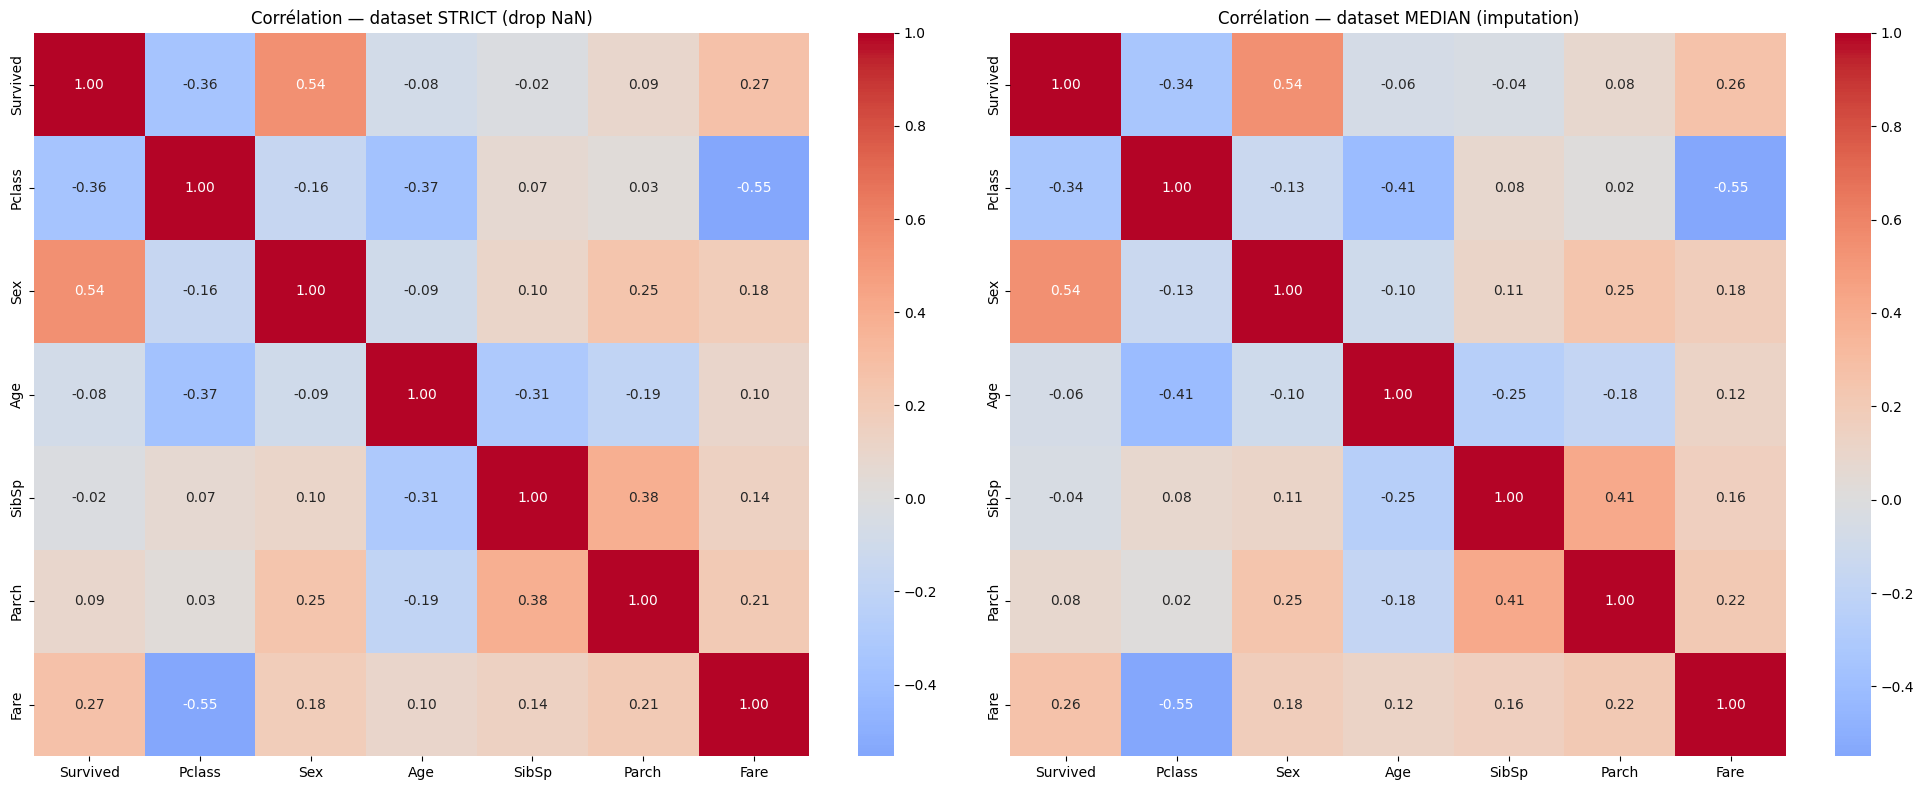

In [16]:
num_strict = df_strict.select_dtypes(include=[np.number]).copy()
num_median = df_median.select_dtypes(include=[np.number]).copy()

corr_strict = num_strict.corr()
corr_median = num_median.corr()

# Heatmaps côte à côte
fig, axes = plt.subplots(1,2, figsize=(20,8))
sns.heatmap(corr_strict, annot=True, cmap='coolwarm', fmt=".2f", center=0, ax=axes[0])
axes[0].set_title("Corrélation — dataset STRICT (drop NaN)")

sns.heatmap(corr_median, annot=True, cmap='coolwarm', fmt=".2f", center=0, ax=axes[1])
axes[1].set_title("Corrélation — dataset MEDIAN (imputation)")

plt.tight_layout()
plt.show()

In [17]:
def print_corr_with_surv(corr_mat, label):
    if 'Survived' in corr_mat.columns:
        print(f"\nCorrélations avec Survived — {label} :")
        print(corr_mat['Survived'].sort_values(ascending=False))
    else:
        print(f"\nSurvived absent dans la matrice de corrélation pour {label}")

print_corr_with_surv(corr_strict, "STRICT")
print_corr_with_surv(corr_median, "MEDIAN")


Corrélations avec Survived — STRICT :
Survived    1.000000
Sex         0.538826
Fare        0.268189
Parch       0.093317
SibSp      -0.017358
Age        -0.077221
Pclass     -0.359653
Name: Survived, dtype: float64

Corrélations avec Survived — MEDIAN :
Survived    1.000000
Sex         0.543351
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.059579
Pclass     -0.338481
Name: Survived, dtype: float64


In [18]:
common_cols = set(corr_strict.columns).intersection(set(corr_median.columns))
diffs = {c: corr_median.loc[c,'Survived'] - corr_strict.loc[c,'Survived'] for c in common_cols}
diffs_series = pd.Series(diffs).sort_values(key=abs, ascending=False)
print("\nDifférences (MEDIAN - STRICT) sur corrélation avec Survived, triées par impact absolu :")
print(diffs_series)


Différences (MEDIAN - STRICT) sur corrélation avec Survived, triées par impact absolu :
Pclass      0.021172
SibSp      -0.017964
Age         0.017642
Parch      -0.011688
Fare       -0.010882
Sex         0.004526
Survived    0.000000
dtype: float64


Les deux méthodes n'apportent pas de grande différences dans ce cas-ci. Nous allons donc **choisir de supprimer les valeurs manquantes** plutôt que de les remplacer afin d'éviter de fausser les données inutilement.

Après analyse nous pouvons aussi voir que les paramètres pouvant avoir un **lien avec le taux de survie** sont le **sexe** et le prix du billet (**fare**). Nous allons garder ses deux colonnes pour le modèle.

### Creation du dataset nettoyé et export en CSV

In [19]:
final_dataset = df_strict
final_columns = ['Survived', 'Sex', 'Fare']
final_dataset = final_dataset[final_columns]

In [20]:
final_dataset.to_csv("../data/titanic_cleaned_dataset.csv", index="False")
print("CSV final sauvegardé : 'titanic_cleaned_dataset.csv'")

CSV final sauvegardé : 'titanic_cleaned_dataset.csv'
